### Select a Cab Compony to invest in!

In [93]:
import numpy as np
import pandas as pd
from datetime import datetime, timedelta

import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import seaborn as sns
from random import randint



In [94]:
df_cab = pd.read_csv('dataset/Cab_Data.csv')
df_city = pd.read_csv('dataset/City.csv')
df_cust = pd.read_csv('dataset/Customer_ID.csv')
df_trans = pd.read_csv('dataset/Transaction_ID.csv')

In [95]:
df_cab.head(2)

Transaction ID  Date of Travel   Company        City  KM Travelled  \
0        10000011           42377  Pink Cab  ATLANTA GA         30.45   
1        10000012           42375  Pink Cab  ATLANTA GA         28.62   

   Price Charged  Cost of Trip  
0         370.95       313.635  
1         358.52       334.854

In [96]:
# Calculate profit
df_cab['Profit'] = df_cab['Price Charged']- df_cab['Cost of Trip']

In [97]:
print("max:", max(df_cab["Date of Travel"])) 
print("min:", min(df_cab["Date of Travel"]))

# (datetime(1899,12,30) + timedelta(days=max(df_cab["Date of Travel"]))).strftime("%Y-%m-%d")


max: 43465
min: 42371


In [98]:
df_cab["Date of Travel"] = df_cab["Date of Travel"].apply(lambda x:(datetime(1899,12,30) + timedelta(days=int(x))).strftime("%Y-%m-%d"))

In [99]:
print("max:", max(df_cab["Date of Travel"])) 
print("min:", min(df_cab["Date of Travel"]))

max: 2018-12-31
min: 2016-01-02


In [100]:
df_cab['Date of Travel'] = pd.to_datetime(df_cab['Date of Travel'])
# Add Year, Mounth and Day to the dataset
df_cab['Year'] = df_cab['Date of Travel'].dt.year
df_cab['Month'] = df_cab['Date of Travel'].dt.month
df_cab['Day'] = df_cab['Date of Travel'].dt.day

In [101]:
df_cab.head(2)

Transaction ID Date of Travel   Company        City  KM Travelled  \
0        10000011     2016-01-08  Pink Cab  ATLANTA GA         30.45   
1        10000012     2016-01-06  Pink Cab  ATLANTA GA         28.62   

   Price Charged  Cost of Trip  Profit  Year  Month  Day  
0         370.95       313.635  57.315  2016      1    8  
1         358.52       334.854  23.666  2016      1    6

In [102]:
df_city.head()

City   Population      Users
0     NEW YORK NY   8,405,837    302,149 
1      CHICAGO IL   1,955,130    164,468 
2  LOS ANGELES CA   1,595,037    144,132 
3        MIAMI FL   1,339,155     17,675 
4  SILICON VALLEY   1,177,609     27,247

In [103]:
# df_city['Population'] = df_city['Population'].str.replace(',','')

In [104]:
def replace_comma(x):
    return int(x.replace(',', ''))
    

In [105]:
df_city["Population"] = df_city["Population"].apply(lambda x:replace_comma(x))
df_city["Users"] = df_city["Users"].apply(lambda x:replace_comma(x))


In [106]:
df_city.head(2)

City  Population   Users
0  NEW YORK NY     8405837  302149
1   CHICAGO IL     1955130  164468

In [107]:
df_cust.head(2)

Customer ID Gender  Age  Income (USD/Month)
0        29290   Male   28               10813
1        27703   Male   27                9237

In [108]:
df_trans.head(2)

Transaction ID  Customer ID Payment_Mode
0        10000011        29290         Card
1        10000012        27703         Card

### Merging Datasets

In [109]:
df = df_cab.merge(df_trans, on='Transaction ID').merge(df_cust, on='Customer ID').merge(df_city, on= 'City')

In [110]:
# Save the new data set
df.to_csv('dataset/mergeddataset.csv')

In [146]:
df = pd.read_csv('dataset/mergeddataset.csv', index_col=0)

In [147]:
# Create seperate dataset for Pink and Yellow cabs
pink_cab = df[df['Company']=='Pink Cab']
yellow_cab = df[df['Company']=='Yellow Cab']

### Exploratory Data Analysis (EDA)

In [113]:
# Determine how many rows are duplicated.
print("Number of duplicated rows in the dataset: ", df.duplicated().sum())

Number of duplicated rows in the dataset:  0


In [114]:
# Determine null values in the dataset
print("Number of null values: ", df.isnull().sum().sum())

Number of null values:  0


In [24]:
print('Number of samples: ', df.shape[0])
print('Number of Features: ', df.shape[1])

Number of samples:  359392
Number of Features:  18


In [25]:
df

Transaction ID Date of Travel     Company           City  \
0             10000011     2016-01-08    Pink Cab     ATLANTA GA   
1             10351127     2018-07-21  Yellow Cab     ATLANTA GA   
2             10412921     2018-11-23  Yellow Cab     ATLANTA GA   
3             10000012     2016-01-06    Pink Cab     ATLANTA GA   
4             10320494     2018-04-21  Yellow Cab     ATLANTA GA   
...                ...            ...         ...            ...   
359387        10307228     2018-03-03  Yellow Cab  WASHINGTON DC   
359388        10319775     2018-04-13  Yellow Cab  WASHINGTON DC   
359389        10347676     2018-07-06  Yellow Cab  WASHINGTON DC   
359390        10358624     2018-08-02  Yellow Cab  WASHINGTON DC   
359391        10370709     2018-08-30  Yellow Cab  WASHINGTON DC   

        KM Travelled  Price Charged  Cost of Trip    Profit  Year  Month  Day  \
0              30.45         370.95      313.6350   57.3150  2016      1    8   
1              26.19         598.70      317.4228  281.2772  2018      7   21   
2              42.55         792.05      597.4020  194.6480  2018     11   23   
3              28.62         358.52      334.8540   23.6660  2016      1    6   
4              36.38         721.10      467.1192  253.9808  2018      4   21   
...              ...            ...           ...       ...   ...    ...  ...   
359387         38.40         668.93      525.3120  143.6180  2018      3    3   
359388          3.57          67.60       44.5536   23.0464  2018      4   13   
359389         23.46         331.97      337.8240   -5.8540  2018      7    6   
359390         27.60         358.23      364.3200   -6.0900  2018      8    2   
359391         34.24         453.11      427.3152   25.7948  2018      8   30   

        Customer ID Payment_Mode  Gender  Age  Income (USD/Month)  Population  \
0             29290         Card    Male   28               10813      814885   
1             29290         Cash    Male   28               10813      814885   
2             29290         Card    Male   28               10813      814885   
3             27703         Card    Male   27                9237      814885   
4             27703         Card    Male   27                9237      814885   
...             ...          ...     ...  ...                 ...         ...   
359387        51406         Cash  Female   29                6829      418859   
359388        51406         Cash  Female   29                6829      418859   
359389        51406         Card  Female   29                6829      418859   
359390        51406         Cash  Female   29                6829      418859   
359391        51406         Card  Female   29                6829      418859   

         Users  
0        24701  
1        24701  
2        24701  
3        24701  
4        24701  
...        ...  
359387  127001  
359388  127001  
359389  127001  
359390  127001  
359391  127001  

[359392 rows x 18 columns]

### Numerical Data

In [73]:
df.describe()

Transaction ID   KM Travelled  Price Charged   Cost of Trip  \
count    3.593920e+05  359392.000000  359392.000000  359392.000000   
mean     1.022076e+07      22.567254     423.443311     286.190113   
std      1.268058e+05      12.233526     274.378911     157.993661   
min      1.000001e+07       1.900000      15.600000      19.000000   
25%      1.011081e+07      12.000000     206.437500     151.200000   
50%      1.022104e+07      22.440000     386.360000     282.480000   
75%      1.033094e+07      32.960000     583.660000     413.683200   
max      1.044011e+07      48.000000    2048.030000     691.200000   

              Profit           Year          Month            Day  \
count  359392.000000  359392.000000  359392.000000  359392.000000   
mean      137.253198    2017.045199       7.500434      15.628447   
std       160.311840       0.800239       3.445095       8.827151   
min      -220.060000    2016.000000       1.000000       1.000000   
25%        28.012000    2016.000000       5.000000       8.000000   
50%        81.962000    2017.000000       8.000000      16.000000   
75%       190.030000    2018.000000      10.000000      23.000000   
max      1463.966000    2018.000000      12.000000      31.000000   

         Customer ID            Age  Income (USD/Month)    Population  \
count  359392.000000  359392.000000       359392.000000  3.593920e+05   
mean    19191.652115      35.336705        15048.822937  3.132198e+06   
std     21012.412463      12.594234         7969.409482  3.315194e+06   
min         1.000000      18.000000         2000.000000  2.489680e+05   
25%      2705.000000      25.000000         8424.000000  6.712380e+05   
50%      7459.000000      33.000000        14685.000000  1.595037e+06   
75%     36078.000000      42.000000        21035.000000  8.405837e+06   
max     60000.000000      65.000000        35000.000000  8.405837e+06   

               Users  
count  359392.000000  
mean   158365.582267  
std    100850.051020  
min      3643.000000  
25%     80021.000000  
50%    144132.000000  
75%    302149.000000  
max    302149.000000

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 359392 entries, 0 to 359391
Data columns (total 18 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Transaction ID      359392 non-null  int64  
 1   Date of Travel      359392 non-null  object 
 2   Company             359392 non-null  object 
 3   City                359392 non-null  object 
 4   KM Travelled        359392 non-null  float64
 5   Price Charged       359392 non-null  float64
 6   Cost of Trip        359392 non-null  float64
 7   Profit              359392 non-null  float64
 8   Year                359392 non-null  int64  
 9   Month               359392 non-null  int64  
 10  Day                 359392 non-null  int64  
 11  Customer ID         359392 non-null  int64  
 12  Payment_Mode        359392 non-null  object 
 13  Gender              359392 non-null  object 
 14  Age                 359392 non-null  int64  
 15  Income (USD/Month)  359392 non-nul

#### Correlation

The degree to which two variables are linearly connected is known as correlation.

Found this article useful: https://towardsdatascience.com/clearly-explained-pearson-v-s-spearman-correlation-coefficient-ada2f473b8

##### Pearson Correlation

In [28]:
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm')

##### Spearman Correlation

In [29]:
scorr = df.corr(method='spearman')
scorr.style.background_gradient(cmap='coolwarm')



The heatmaps show a strong relationship between 'KM Travelled,' 'Price Charged,' and 'Cost of Trip.' Additionally, and this is rather evident, there is a significant correlation between the 'Population' and 'Users.' 

### Normalizing the Profit
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

In [30]:
# sns.set_theme()

In [31]:
# fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))

# sns.histplot(df['Profit'], kde=True, stat="density", kde_kws=dict(cut=3), alpha=.4, edgecolor=(1, 1, 1, .4), ax=ax[0])
# ax[0].set_title('Before Normalization')

# # use log1p to normalize
# df['Profit'] = np.log1p(df['Profit'])
# ax[1].set_title('After Normalization')
# sns.histplot(df['Profit'], kde=True, stat="density", kde_kws=dict(cut=3), alpha=.4, edgecolor=(1, 1, 1, .4), ax=ax[1])
# plt.show()

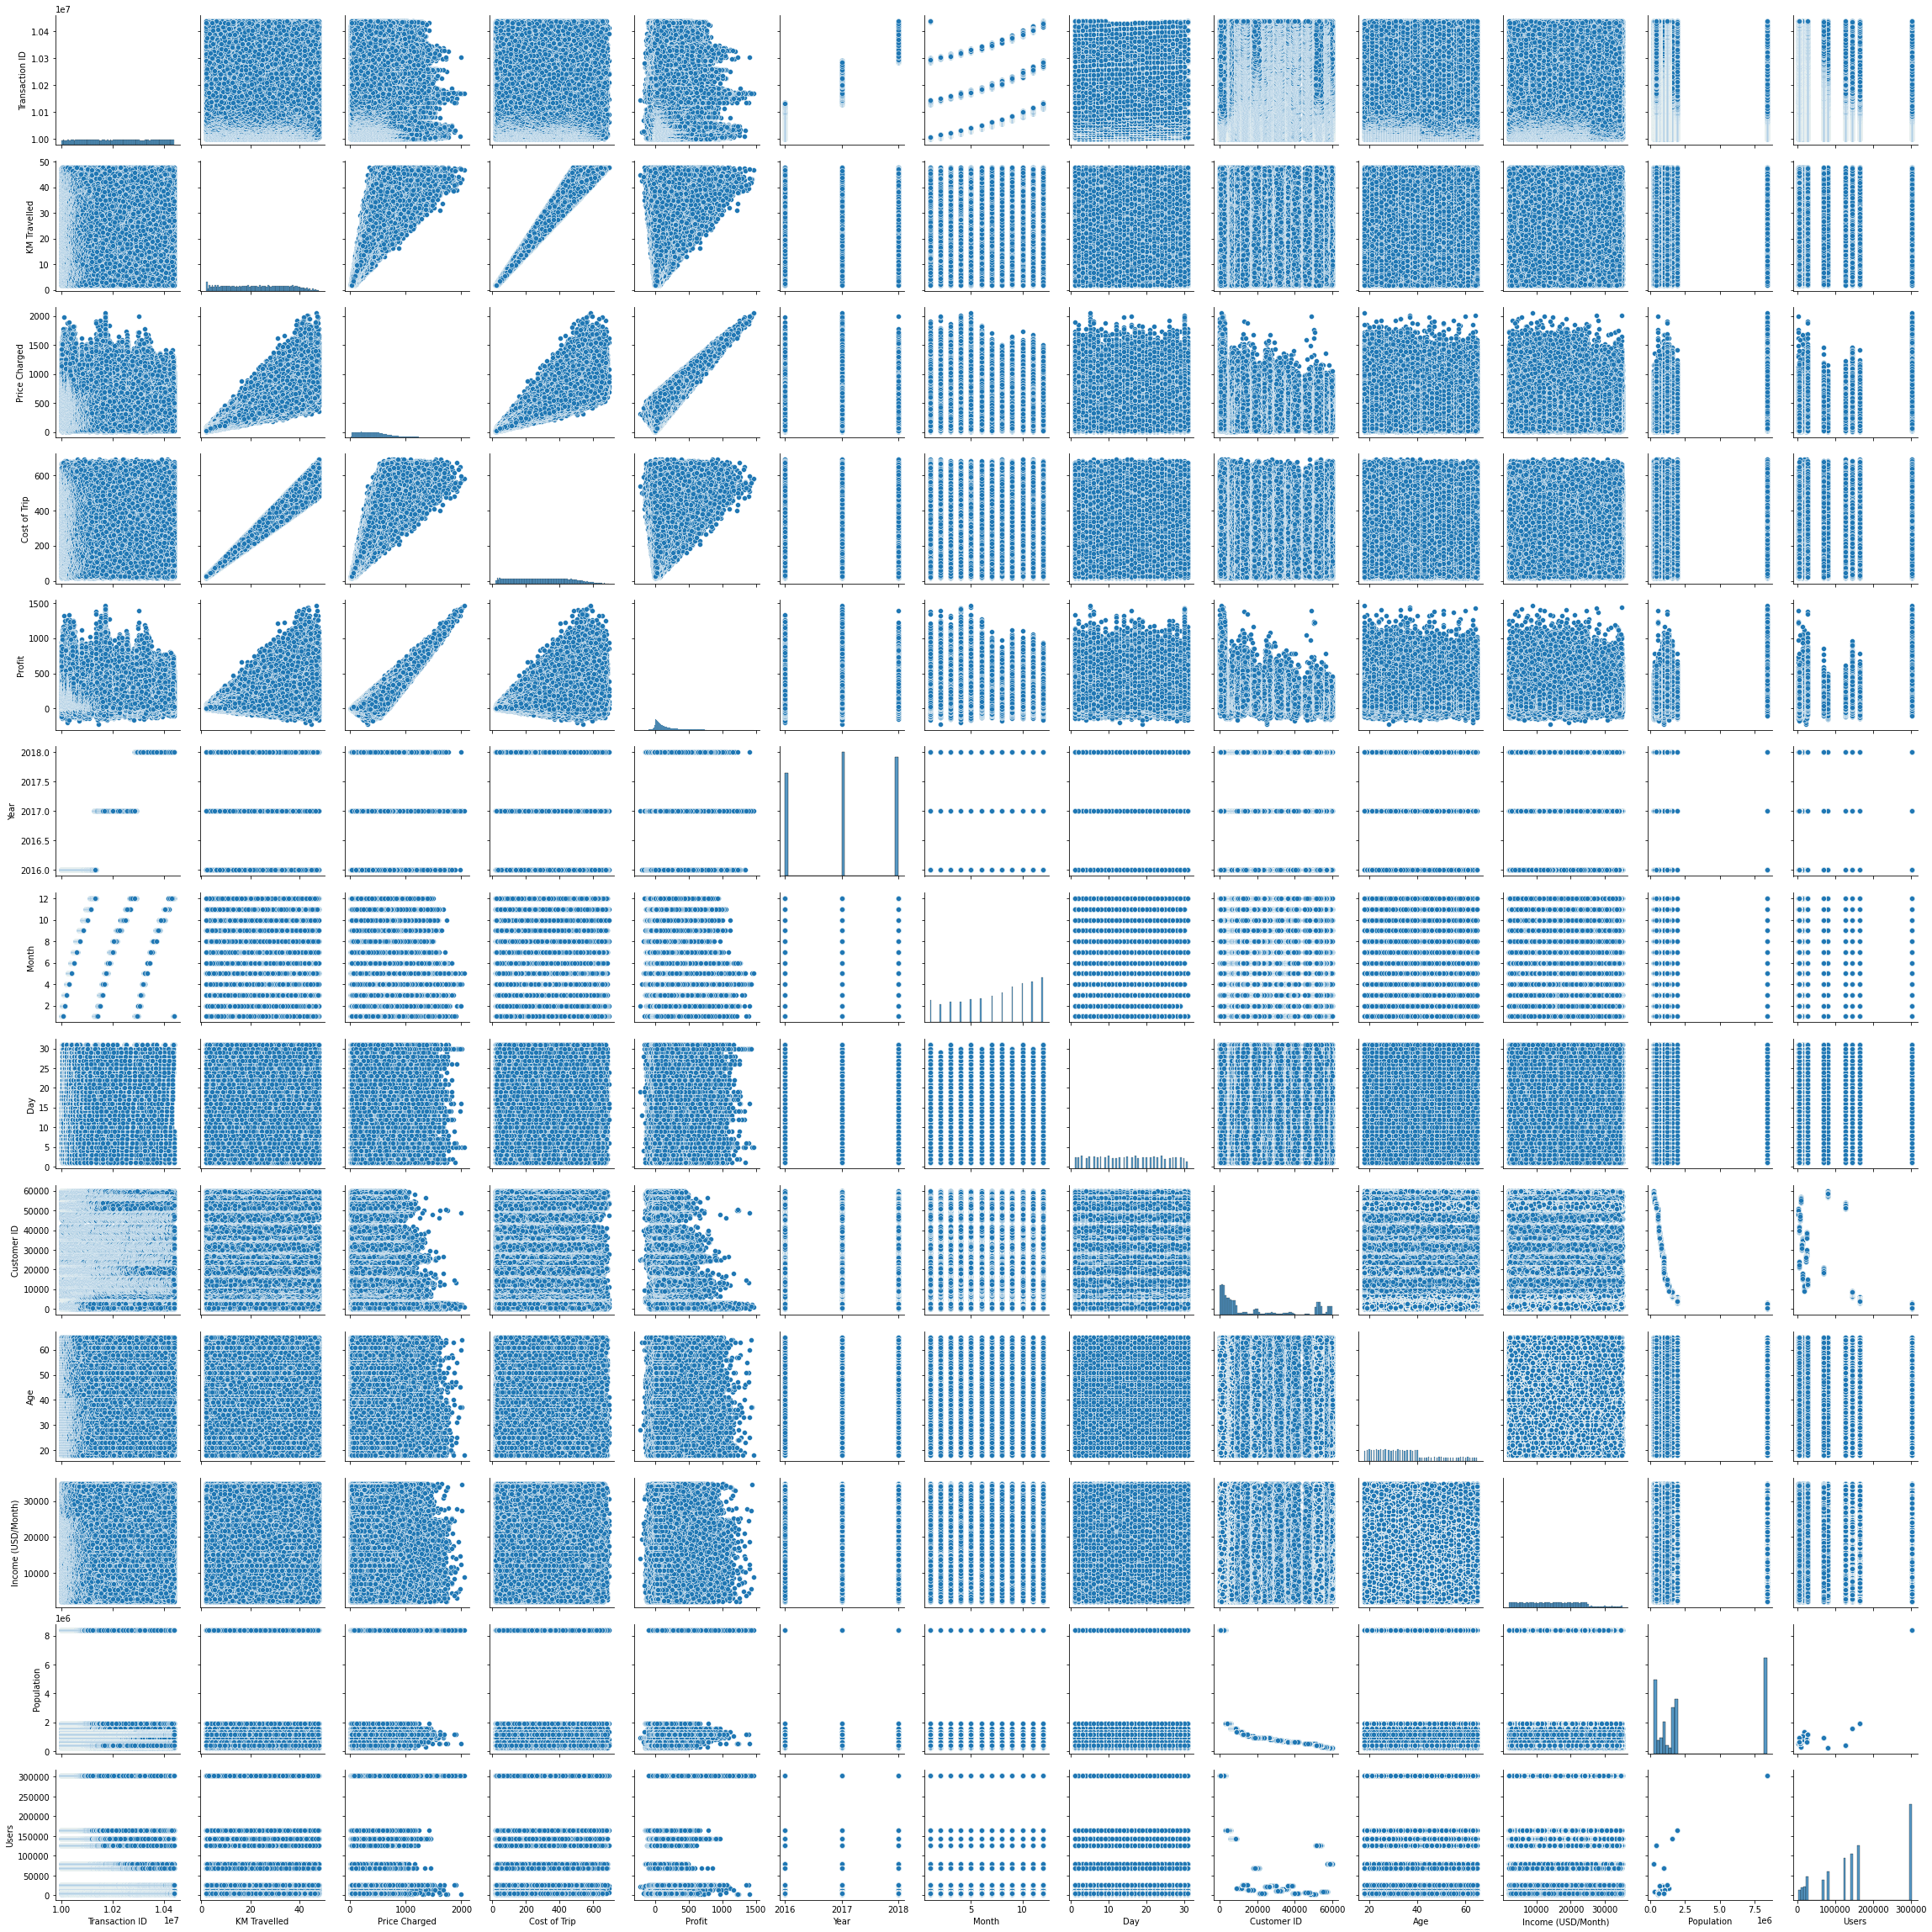

In [56]:
sns.pairplot(df)

In [57]:
sns.pairplot(df[['Company','KM Travelled','Price Charged','Cost of Trip','Profit']].head(10000),hue = 'Company')

In [33]:
df.head(2)

Transaction ID Date of Travel     Company        City  KM Travelled  \
0        10000011     2016-01-08    Pink Cab  ATLANTA GA         30.45   
1        10351127     2018-07-21  Yellow Cab  ATLANTA GA         26.19   

   Price Charged  Cost of Trip    Profit  Year  Month  Day  Customer ID  \
0         370.95      313.6350   57.3150  2016      1    8        29290   
1         598.70      317.4228  281.2772  2018      7   21        29290   

  Payment_Mode Gender  Age  Income (USD/Month)  Population  Users  
0         Card   Male   28               10813      814885  24701  
1         Cash   Male   28               10813      814885  24701

#### Categorical Data

In [148]:
df_cat = df.select_dtypes(include = 'object').copy()

In [149]:
df_cat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 359392 entries, 0 to 359391
Data columns (total 5 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   Date of Travel  359392 non-null  object
 1   Company         359392 non-null  object
 2   City            359392 non-null  object
 3   Payment_Mode    359392 non-null  object
 4   Gender          359392 non-null  object
dtypes: object(5)
memory usage: 16.5+ MB


In [150]:
df['Company'].unique()

array(['Pink Cab', 'Yellow Cab'], dtype=object)

In [151]:
df['City'].unique()

array(['ATLANTA GA', 'AUSTIN TX', 'BOSTON MA', 'CHICAGO IL', 'DALLAS TX',
       'DENVER CO', 'LOS ANGELES CA', 'MIAMI FL', 'NASHVILLE TN',
       'NEW YORK NY', 'ORANGE COUNTY', 'PHOENIX AZ', 'PITTSBURGH PA',
       'SACRAMENTO CA', 'SAN DIEGO CA', 'SEATTLE WA', 'SILICON VALLEY',
       'TUCSON AZ', 'WASHINGTON DC'], dtype=object)

In [152]:
len(df['City'].unique())

19

In [153]:
df['Payment_Mode'].unique()

array(['Card', 'Cash'], dtype=object)

In [154]:
df['Gender'].unique()

array(['Male', 'Female'], dtype=object)

#### Frequency Distribution¶

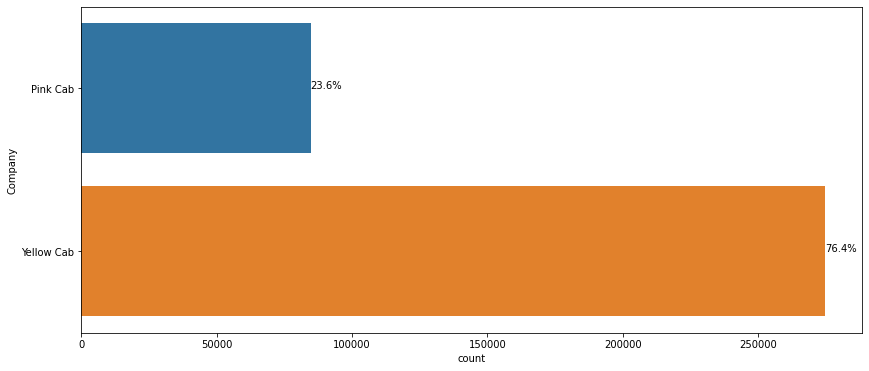

In [155]:
plt.figure(figsize=(14,6))
ax = sns.countplot(y="Company", data=df_cat)
total = len(df_cat['Company'])
for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_width()/total)
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x, y))

plt.show()

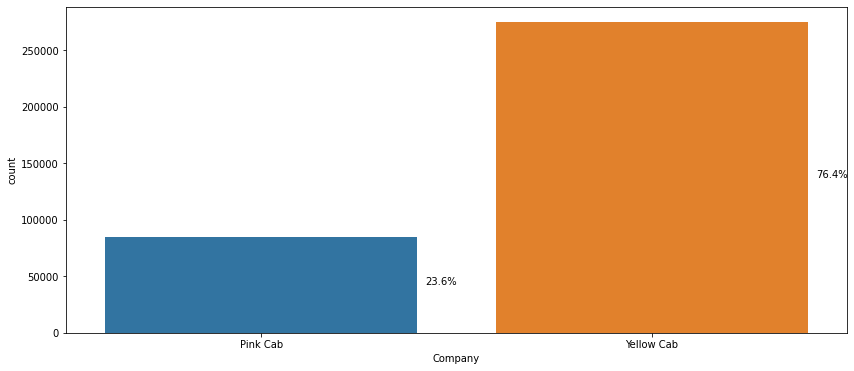

In [156]:
plt.figure(figsize=(14,6))
ax =sns.countplot(data = df_cat, x = 'Company')
total = len(df_cat['Company'])
for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x, y))
plt.show()

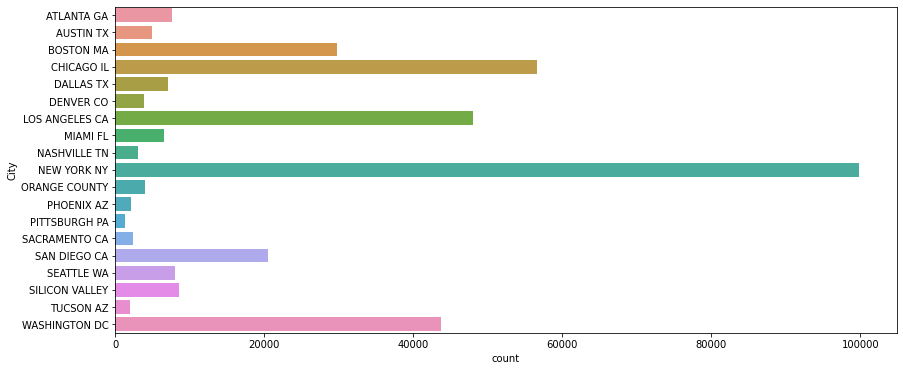

In [157]:
plt.figure(figsize=(14,6))
sns.countplot(data = df_cat, y = 'City')
plt.show()

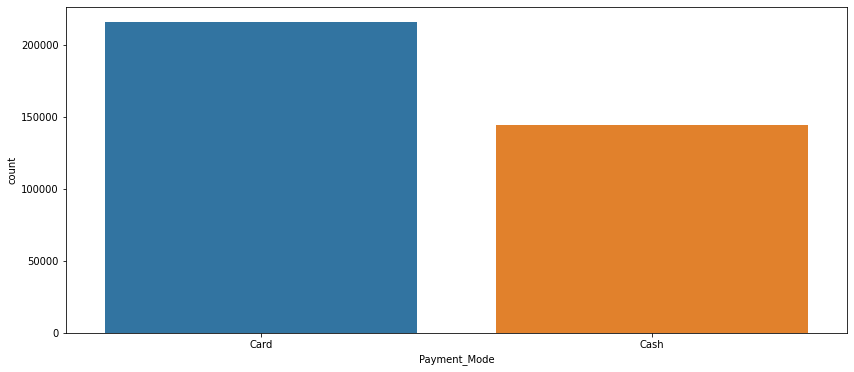

In [158]:
plt.figure(figsize=(14,6))
sns.countplot(data = df_cat, x = 'Payment_Mode')
plt.show()

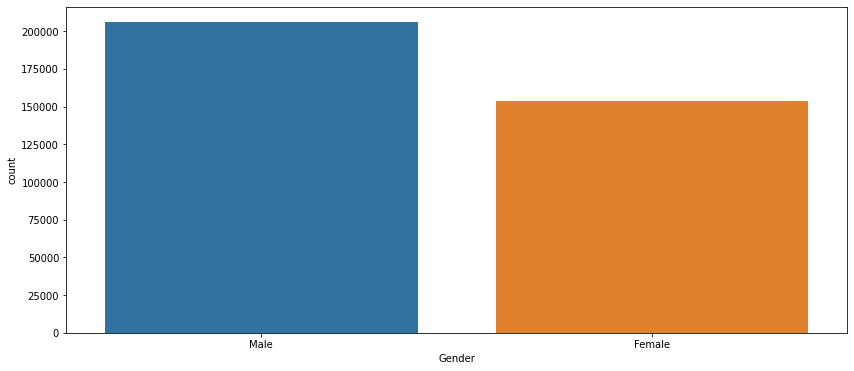

In [159]:
plt.figure(figsize=(14,6))
sns.countplot(data = df_cat, x = 'Gender')
plt.show()

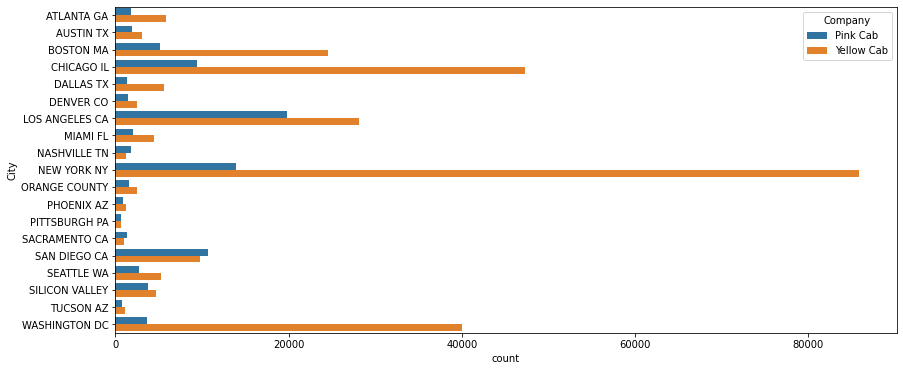

In [160]:
plt.figure(figsize=(14,6))
sns.countplot(data=df, y="City", hue="Company")
plt.show()


People in the cities of "Boston," "Chicago," "Los Angeles," "New York" and "Washington," far prefer Yellow Cab rather than Pink.

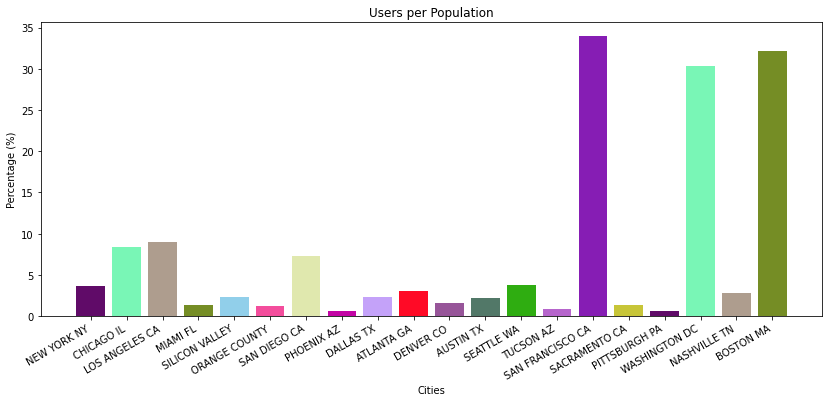

In [161]:
users_per_population = (df_city['Users'] /df_city['Population']) * 100 
city = df_city['City']
# Get the list of color

colors = []
n = 16

for i in range(n):
    colors.append('#%06X' % randint(0, 0xFFFFFF))

plt.figure(figsize = (14, 6))
plt.bar(city, users_per_population, color = colors)
plt.gcf().autofmt_xdate()
plt.title('Users per Population')
plt.ylabel('Percentage (%)')
plt.xlabel('Cities')
plt.show()

More than 30% of people in the cities of "San Francisco," "Washington," and "Boston" use taxis. 

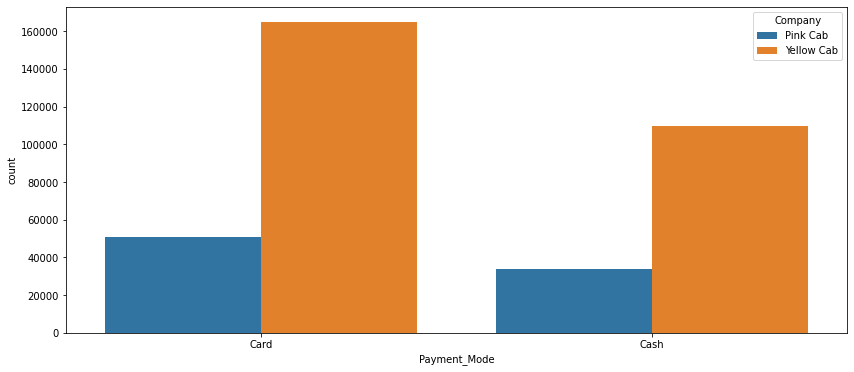

In [162]:
plt.figure(figsize=(14,6))
sns.countplot(data=df, x="Payment_Mode", hue="Company")
plt.show()

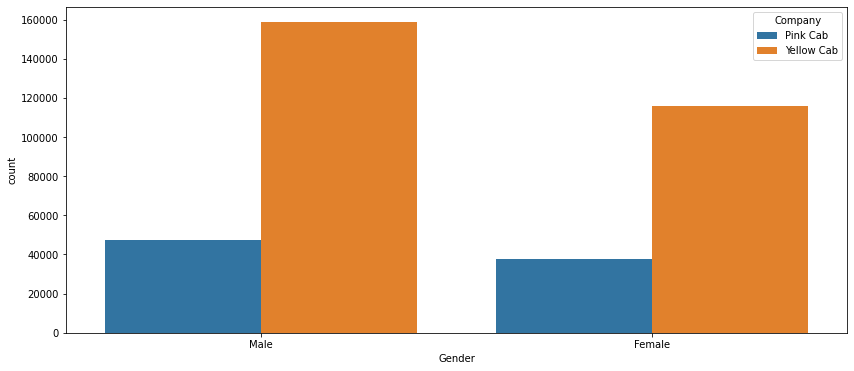

In [163]:
plt.figure(figsize=(14,6))
sns.countplot(data=df, x="Gender", hue="Company")
plt.show()

#### ----------------

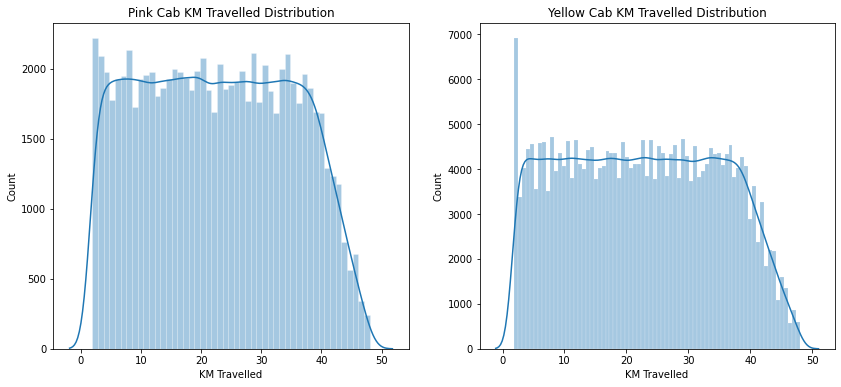

In [164]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))

sns.histplot(pink_cab['KM Travelled'], kde=True, kde_kws=dict(cut=3), alpha=.4, edgecolor=(1, 1, 1, .4), ax=ax[0])
ax[0].set_title('Pink Cab KM Travelled Distribution')
ax[1].set_title('Yellow Cab KM Travelled Distribution')
sns.histplot(yellow_cab['KM Travelled'], kde=True, kde_kws=dict(cut=3), alpha=.4, edgecolor=(1, 1, 1, .4), ax=ax[1])
plt.show()

Most rides range in length from 2 to 48 kilometres for both Pink and Yellow cabs.

### Which company has maximum cab users at a particular time period?

In [165]:
pink_cab = df[df.Company == 'Pink Cab'].groupby('Month').Month.count()
Yellow_cab = df[df.Company == 'Yellow Cab'].groupby(['Month']).Month.count()

In [166]:
pink_cab

Month
1      5057
2      3375
3      4223
4      4083
5      4960
6      5877
7      6590
8      7739
9      9658
10    10576
11    11005
12    11568
Name: Month, dtype: int64

In [167]:
Yellow_cab

Month
1     18117
2     14932
3     17423
4     17351
5     18741
6     18836
7     21086
8     23584
9     27201
10    30276
11    31695
12    35439
Name: Month, dtype: int64

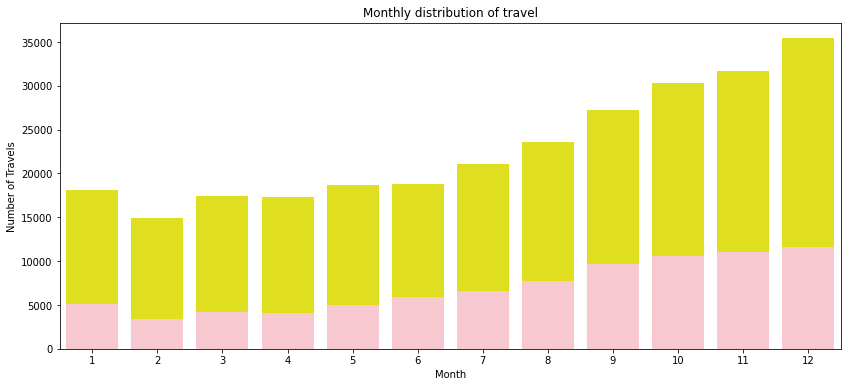

In [168]:
plt.figure(figsize=(14,6))
sns.barplot(x=Yellow_cab.index,y=Yellow_cab.values, color='Yellow',label='Yellow Cab')
sns.barplot(x=pink_cab.index,y=pink_cab.values, color='Pink',label='Pink Cab')
plt.title('Monthly distribution of travel')
plt.xlabel('Month')
plt.ylabel('Number of Travels')
plt.show()

In [169]:
df['Year'].value_counts()

2017    128510
2018    123563
2016    107319
Name: Year, dtype: int64

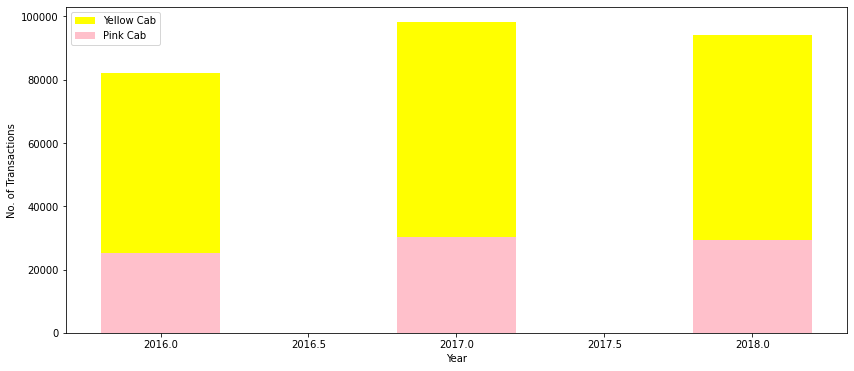

In [170]:
pink_cab_y = df[df.Company=='Pink Cab'].groupby('Year').Year.count()
Yellow_cab_y = df[df.Company=='Yellow Cab'].groupby('Year').Year.count()
plt.figure(figsize=(14,6))
ax = plt.subplot(111)
ax.bar(pink_cab_y.index, Yellow_cab_y.values, width=0.4, color='yellow', align='center',label='Yellow Cab')
ax.bar(pink_cab_y.index, pink_cab_y.values, width=0.4, color='pink', align='center',label='Pink Cab')
plt.ylabel('No. of Transactions')
plt.xlabel('Year')
plt.legend()
plt.show()

In all months, Yellow Cab sees a higher volume of passengers. In December, it had the most trips (35439), compared to Pink Cab's 11568.

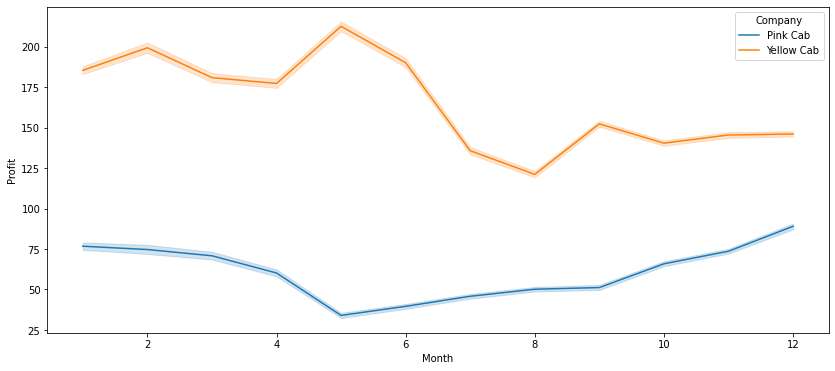

In [171]:
plt.figure(figsize = (14, 6))
sns.lineplot(x='Month', y='Profit', hue="Company", data=df)
plt.xlabel("Month")
plt.ylabel("Profit")
plt.show()

Month to month, the profit margin changes. 

In [172]:
plt.figure(figsize = (14, 6))
sns.lineplot(x='Year', y='Profit', hue="Company", data=df)
plt.xlabel("Year")
plt.ylabel("Profit")
plt.show()

The margin for both Pink and Yellow caps decreas during the years.

### Does margin proportionally increase with increase in number of customers?

In [173]:
pink_profit = df[df.Company == 'Pink Cab'].groupby('Month').Profit.sum()
yellow_profit = df[df.Company == 'Yellow Cab'].groupby('Month').Profit.sum()

In [174]:
pink_profit

Month
1      388054.602
2      252041.309
3      299096.571
4      245818.095
5      168613.914
6      232715.233
7      301885.097
8      388251.300
9      494435.325
10     696437.071
11     810326.172
12    1029653.632
Name: Profit, dtype: float64

In [175]:
plt.figure(figsize=(14,6))
sns.barplot(x=pink_profit.index,y=yellow_profit, color='Yellow')
sns.barplot(x=pink_profit.index,y=pink_profit, color='Pink')

plt.title('Profit)')
plt.xlabel('Month')

plt.ylabel('Profit')
plt.show()

The margin increases with an increase in the number of customers

### Does margin proportionally increase with increase by travelled distance?

In [176]:
company = df.groupby('Company')
mean_price_charged = company['Price Charged'].mean()
mean_trip_cost = company['Cost of Trip'].mean()
mean_trip_cost

Company
Pink Cab      248.148682
Yellow Cab    297.922004
Name: Cost of Trip, dtype: float64

In [177]:
plt.figure(figsize = (14, 6))
plt.bar(mean_price_charged.index, mean_price_charged, label="Price Charged")
plt.bar(mean_trip_cost.index, mean_trip_cost, label="Cost of Trip")
plt.legend()
plt.show()

In comparison to the Pink cab, the Yellow cab has a bigger profit margin.

In [178]:
plt.figure(figsize = (14, 6))
sns.boxplot(data = df, x='Company', y='Price Charged')
plt.show()


"Yellow Cab" Price Charged is higher than " Pink Cab"

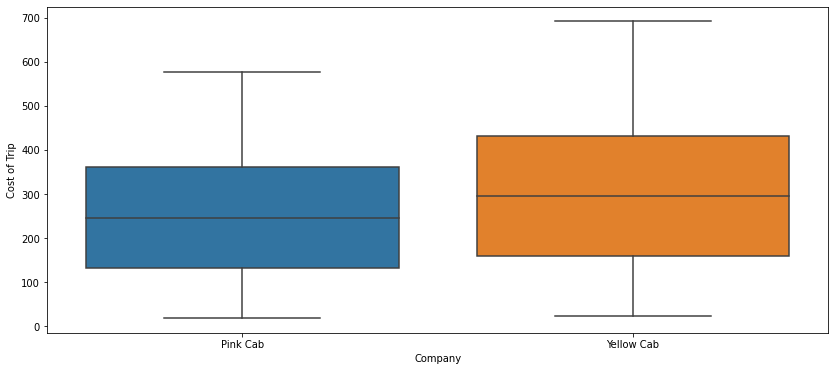

In [179]:
plt.figure(figsize = (14, 6))
sns.boxplot(data = df, x='Company', y='Cost of Trip')
plt.show()


In [180]:
plt.figure(figsize = (14, 6))
sns.boxplot(data = df, x='Company', y='Profit')
plt.show()

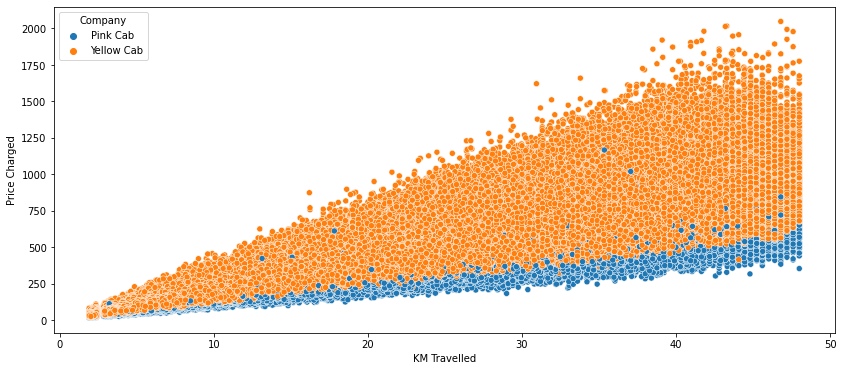

In [181]:
plt.figure(figsize = (14, 6))
sns.scatterplot(data=df, x="KM Travelled", y='Price Charged', hue='Company')
plt.show()

In [182]:
plt.figure(figsize = (14, 6))
sns.scatterplot(data=df[df.Company == "Pink Cab"], x="KM Travelled", y='Profit')
plt.show()

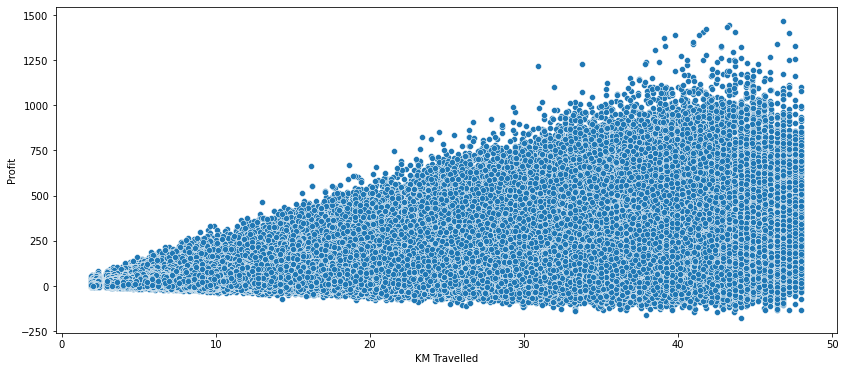

In [183]:
plt.figure(figsize = (14, 6))
sns.scatterplot(data=df[df.Company == "Yellow Cab"], x="KM Travelled", y='Profit')
plt.show()

In [184]:
df.columns

Index(['Transaction ID', 'Date of Travel', 'Company', 'City', 'KM Travelled',
       'Price Charged', 'Cost of Trip', 'Profit', 'Year', 'Month', 'Day',
       'Customer ID', 'Payment_Mode', 'Gender', 'Age', 'Income (USD/Month)',
       'Population', 'Users'],
      dtype='object')

In [185]:
Pinc_df = df[df['Company']=='Pink Cab']['KM Travelled']

In [186]:
df[df['Company']=='Pink Cab']['KM Travelled'].corr(df[df['Company']=='Pink Cab']['Profit'])

0.44263250048084657

In [187]:
df[df['Company']=='Yellow Cab']['KM Travelled'].corr(df[df['Company']=='Yellow Cab']['Profit'])

0.5031522082950759

The margin might not be increased by the KM travelled, this might be due to discounts.

In [188]:
fig = plt.figure()

ax1 = fig.add_subplot(2,1,1) 
sns.countplot(data = df_cat, x = 'Company', ax = ax1)

ax2 = fig.add_subplot(2,1,2) 
sns.boxplot(data = df, x='Company', y='Age', ax=ax2)
sns.violinplot(data = df, x='Company', y='Age' , ax = ax2)

<AxesSubplot:xlabel='Company', ylabel='Age'>

<AxesSubplot:xlabel='Company', ylabel='Age'>

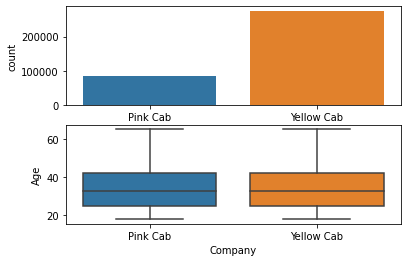

In [189]:
fig = plt.figure()

ax1 = fig.add_subplot(2,1,1) 
sns.countplot(data = df_cat, x = 'Company', ax = ax1)

ax2 = fig.add_subplot(2,1,2) 
sns.boxplot(data = df, x='Company', y='Age', ax=ax2)


In [190]:
df = pd.read_csv('dataset/mergeddataset.csv', index_col='Date of Travel', parse_dates=True)
del df['Unnamed: 0']

In [191]:
df.groupby('Month').Month.count().plot()



<AxesSubplot:xlabel='Month'>

In [192]:
df[df.Company == 'Pink Cab'].groupby('Month').Month.count()


Month
1      5057
2      3375
3      4223
4      4083
5      4960
6      5877
7      6590
8      7739
9      9658
10    10576
11    11005
12    11568
Name: Month, dtype: int64

In [193]:
df[df.Company == 'Yellow Cab'].groupby(['Month']).Month.count().plot()

<AxesSubplot:xlabel='Month'>

<AxesSubplot:xlabel='Day'>

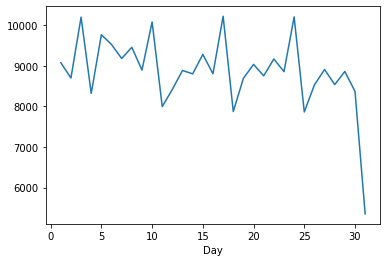

In [194]:
df[df.Company == 'Yellow Cab'].groupby(['Day']).Day.count().plot()

In [195]:
df[(df.Company == 'Yellow Cab') & (df.Year == 2016)].groupby(['Day']).Day.count().plot()

<AxesSubplot:xlabel='Day'>

In [196]:
df[(df.Company == 'Yellow Cab') & (df.Year == 2016)].groupby(['Month']).Day.count()

Month
1      3719
2      4674
3      5146
4      5360
5      5967
6      5667
7      6814
8      6918
9      8130
10     9697
11     9320
12    10827
Name: Day, dtype: int64

In [197]:
df[(df.Company == 'Yellow Cab') & (df.Year == 2016)].groupby(['Day']).Day.count()

Day
1     2281
2     2581
3     2958
4     2603
5     2497
6     2838
7     2379
8     2376
9     2695
10    3111
11    2816
12    2553
13    2856
14    2479
15    2570
16    2761
17    3183
18    2790
19    2601
20    2853
21    2482
22    2449
23    2848
24    3073
25    2697
26    2640
27    2786
28    2458
29    2494
30    2707
31    1824
Name: Day, dtype: int64

In [198]:
df[(df.Year == 2016)].groupby(['Day']).Day.count().plot()

<AxesSubplot:xlabel='Day'>